In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import itertools


In [2]:
df = pd.read_pickle('../data/interim/processed_data.pkl')
df.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,64
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,64
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,64
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,64
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,64


In [3]:
df.reset_index(drop=True, inplace=True)
df.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
0,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,64
1,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,64
2,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,64
3,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,64
4,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,64


In [4]:
X = df[['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']]
y = df['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

trained_data = pd.concat([X_train_df, y_train_df], axis=1)

trained_data.to_csv('../data/interim/trained_data_SVM.csv')

In [6]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8168701442841287

Classification Report:
              precision    recall  f1-score   support

       bench       0.86      0.85      0.86       335
        dead       0.62      0.63      0.62       286
         ohp       0.85      0.88      0.87       333
        rest       0.94      0.93      0.94       213
         row       0.64      0.61      0.63       298
       squat       0.98      0.99      0.98       337

    accuracy                           0.82      1802
   macro avg       0.82      0.82      0.82      1802
weighted avg       0.82      0.82      0.82      1802


Confusion Matrix:
[[286   0  48   1   0   0]
 [  0 179   0   4 103   0]
 [ 40   0 293   0   0   0]
 [  5   0   2 198   0   8]
 [  0 111   0   4 183   0]
 [  0   0   1   3   0 333]]


/opt/homebrew/anaconda3/envs/python-basic/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 6 features as input.

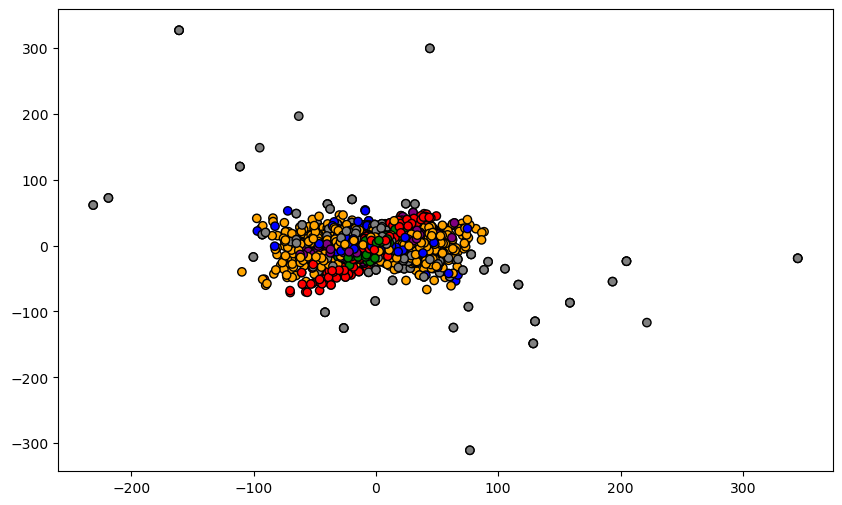

In [27]:

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10, 6))

colors = {'bench': 'blue', 'dead': 'red', 'squat': 'green', 'ohp': 'orange', 'row': 'purple'}

default_color = 'gray' 
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=[colors.get(label, default_color) for label in y_train], edgecolors='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary Visualization')
plt.show()


Confusion matrix, without normalization


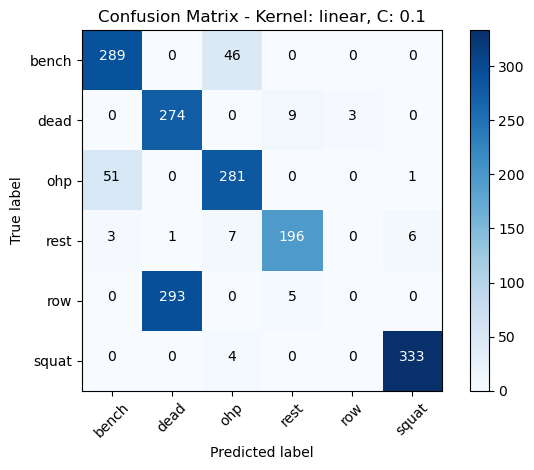

Confusion matrix, without normalization


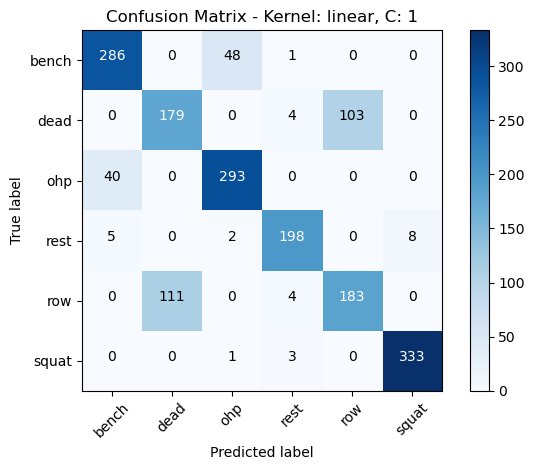

Confusion matrix, without normalization


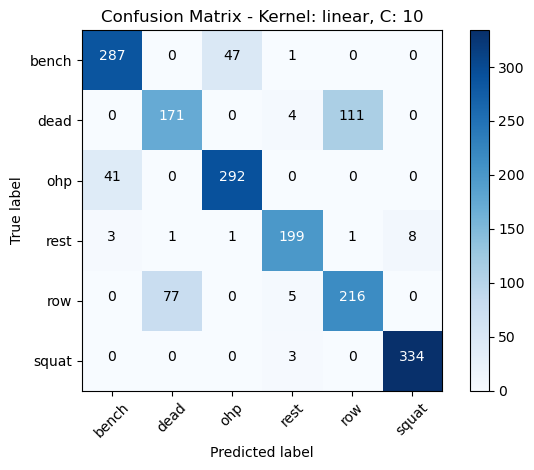

Confusion matrix, without normalization


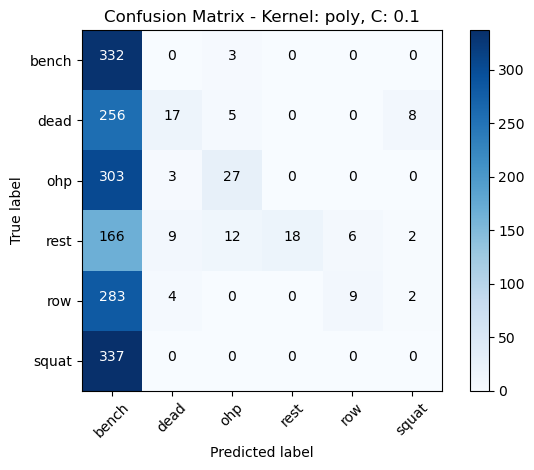

Confusion matrix, without normalization


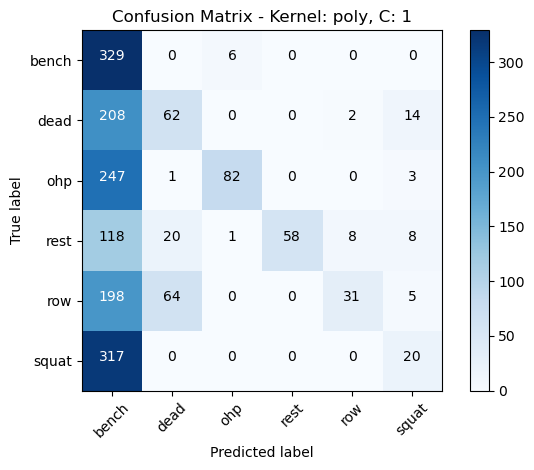

Confusion matrix, without normalization


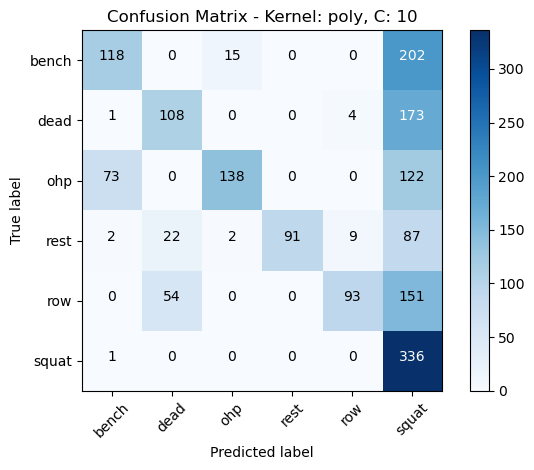

Confusion matrix, without normalization


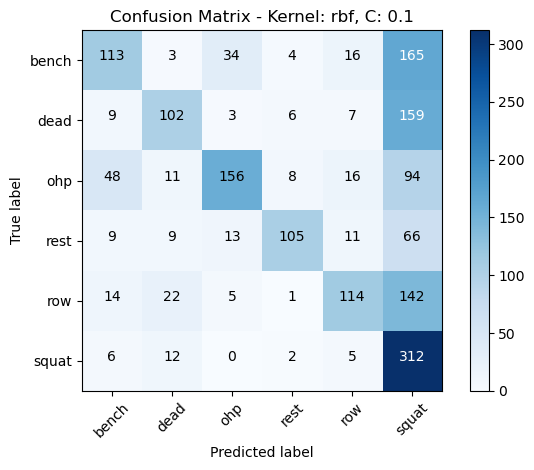

Confusion matrix, without normalization


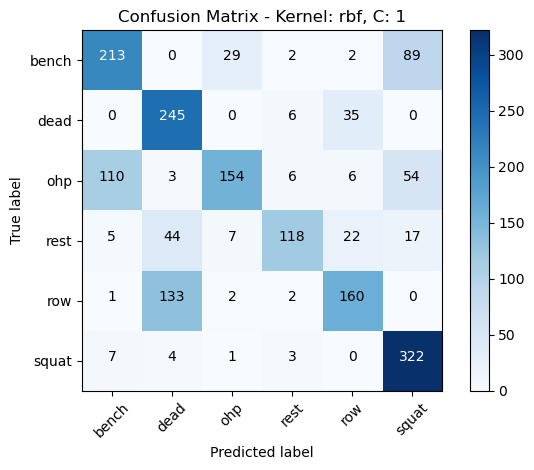

Confusion matrix, without normalization


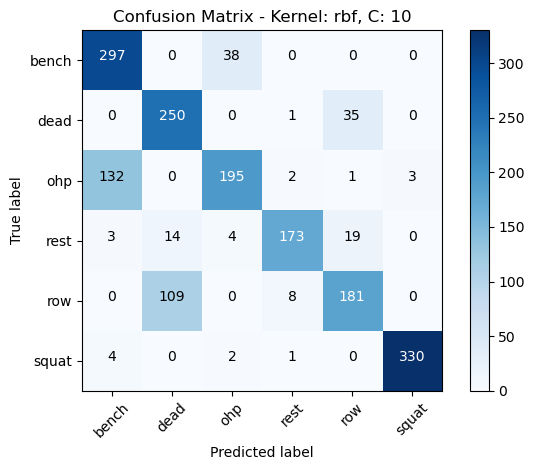

In [22]:


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]

models = {}
confusion_matrices = {}

for kernel in kernels:
    models[kernel] = {}
    confusion_matrices[kernel] = {}
    for C in C_values:
        svm_model = SVC(kernel=kernel, C=C)
        svm_model.fit(X_train, y_train)
        models[kernel][C] = svm_model
        
        y_pred = svm_model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices[kernel][C] = cm
        
        plt.figure()
        plot_confusion_matrix(cm, classes=np.unique(y), title=f'Confusion Matrix - Kernel: {kernel}, C: {C}')
        plt.show()


/opt/homebrew/anaconda3/envs/python-basic/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 6 features as input.

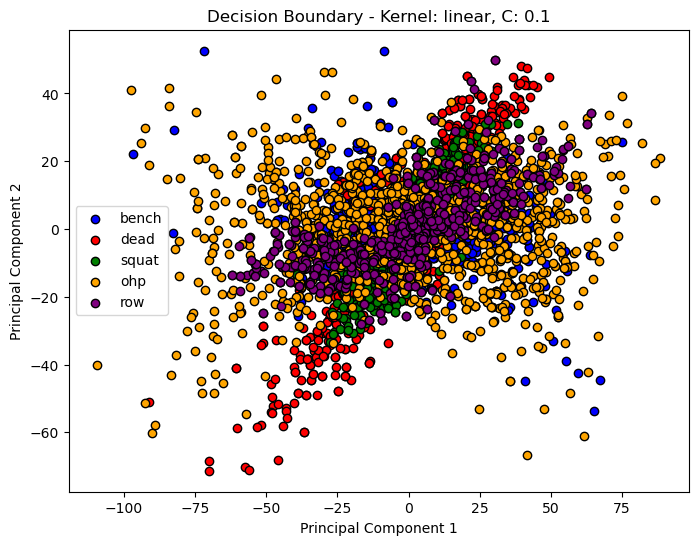

In [28]:
# Define colors for specific labels
label_colors = {'bench': 'blue', 'dead': 'red', 'squat': 'green', 'ohp': 'orange', 'row': 'purple'}

# Step 5: Train SVM Models with Different Kernels and C Values
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]

for kernel in kernels:
    for C in C_values:
        # Train SVM Model
        svm_model = SVC(kernel=kernel, C=C)
        svm_model.fit(X_train, y_train)
        
        # Apply PCA for visualization
        pca = PCA(n_components=2)
        X_train_pca = pca.fit_transform(X_train)
        
        # Plot decision boundary
        plt.figure(figsize=(8, 6))
        for label, color in label_colors.items():
            mask = (y_train == label)
            plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], label=label, c=color, edgecolors='k')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title(f'Decision Boundary - Kernel: {kernel}, C: {C}')
        plt.legend()
        
        # Plot decision boundary and margins
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = svm_model.decision_function(xy).reshape(XX.shape)
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
        
        plt.show()
